In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys
sys.path.append('../src')

In [22]:
import torch
import scipy.sparse as sp
import glob
import warnings
import anndata
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import seaborn as sns
import torch
import pandas as pd

In [23]:
import spaceoracle
from spaceoracle.models.estimators import ViTEstimatorV2, device

In [84]:
adata_train = sc.read_h5ad('./.cache/adata_train.h5ad')
adata_train

AnnData object with n_obs × n_vars = 15870 × 5010
    obs: 'cluster', 'rctd_cluster', 'rctd_celltypes'
    uns: 'log1p'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [85]:
sc.pp.highly_variable_genes(adata_train, n_top_genes=100, subset=True, inplace=True)
adata_train

AnnData object with n_obs × n_vars = 15870 × 100
    obs: 'cluster', 'rctd_cluster', 'rctd_celltypes'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [86]:
%%time

so = spaceoracle.SpaceOracle(
    adata=adata_train,
    annot='rctd_cluster', 
    max_epochs=15, 
    learning_rate=7e-4, 
    spatial_dim=64,
    batch_size=256,
    rotate_maps=True,
    test_mode=True
)

🌍️ Generating spatial 64x64 maps...*
CPU times: user 1.9 s, sys: 2.89 s, total: 4.79 s
Wall time: 803 ms


In [87]:
so.queue

OracleQueue with 65 remaining genes

In [88]:
so.run()

In [72]:
so.queue

OracleQueue with 0 remaining genes

In [31]:
so.save_dir

'./models'

In [74]:
so.load_betadata('Prdm9', so.save_dir)

beta0  beta_Fos  beta_Hic1  beta_Mafb  beta_Pbx3  \
AAAAAAAGCCAACA  0.002869 -0.000338  -0.001301  -0.012796   0.003481   
AAAAAACGGTAGAT  0.001745 -0.000156  -0.001808  -0.008623   0.002065   
AAAAAATCCGGCGA  0.005086 -0.005381   0.003666  -0.070012  -0.002120   
AAAAACCGTCAGAC  0.003038 -0.000310  -0.001399  -0.011925   0.003144   
AAAAACGCTCCGAC  0.002798 -0.000266  -0.001509  -0.010414   0.003028   
...                  ...       ...        ...        ...        ...   
TTTTTTGTACGATT  0.001722 -0.000110  -0.002095  -0.005909   0.001508   
TTTTTTTATGGTAC  0.001733 -0.000164  -0.002061  -0.006992   0.001490   
TTTTTTTGTCGCCT -0.002066  0.015334  -0.009549  -0.002812   0.000271   
TTTTTTTTATTATA  0.002845 -0.000262  -0.001558  -0.010653   0.002869   
TTTTTTTTGCTTTA  0.002629 -0.000286  -0.001444  -0.011558   0.003450   

                beta_Prox1       Fos      Hic1      Mafb      Pbx3     Prdm9  \
AAAAAAAGCCAACA    0.004017  0.001253  0.000822  0.004863  0.000280  0.000998   
AAAAAACGGTAGAT    0.002981  0.002270  0.001383  0.006248  0.001796  0.000998   
AAAAAATCCGGCGA    0.005105  0.001253  0.001414  0.005554  0.002454  0.000000   
AAAAACCGTCAGAC    0.003779  0.001253  0.000822  0.005332  0.000280  0.002082   
AAAAACGCTCCGAC    0.003392  0.001253  0.000822  0.006107  0.001456  0.000998   
...                    ...       ...       ...       ...       ...       ...   
TTTTTTGTACGATT    0.002237  0.001253  0.000269  0.006168  0.000798  0.000998   
TTTTTTTATGGTAC    0.002511  0.002004  0.000822  0.019839  0.001456  0.001776   
TTTTTTTGTCGCCT    0.009839  0.001504  0.001490  0.006811  0.002659  0.000778   
TTTTTTTTATTATA    0.003362  0.002114  0.000269  0.004046  0.000798  0.000998   
TTTTTTTTGCTTTA    0.003755  0.001253  0.000822  0.009290  0.001567  0.000998   

                   Prox1  rctd_cluster  rctd_celltypes       x       y  \
AAAAAAAGCCAACA  0.000568             0          B-cell -1255.0  3184.0   
AAAAAACGGTAGAT  0.000000             0          B-cell -4252.0  2626.2   
AAAAAATCCGGCGA  0.000000             4             Tfh -2952.4  1975.3   
AAAAACCGTCAGAC  0.000000             0          B-cell -2480.0  1516.6   
AAAAACGCTCCGAC  0.000000             0          B-cell -2764.1  1255.7   
...                  ...           ...             ...     ...     ...   
TTTTTTGTACGATT  0.000000             0          B-cell -2052.1  2937.7   
TTTTTTTATGGTAC  0.000568             0          B-cell -2631.3  2694.2   
TTTTTTTGTCGCCT  0.000568             3  Resting T-cell -1946.6  1154.2   
TTTTTTTTATTATA  0.000000             0          B-cell -1936.5  1873.5   
TTTTTTTTGCTTTA  0.000568             0          B-cell -4295.6  2514.8   

                target_Prdm9  
AAAAAAAGCCAACA      0.002869  
AAAAAACGGTAGAT      0.001745  
AAAAAATCCGGCGA      0.005086  
AAAAACCGTCAGAC      0.003038  
AAAAACGCTCCGAC      0.002798  
...                      ...  
TTTTTTGTACGATT      0.001722  
TTTTTTTATGGTAC      0.001733  
TTTTTTTGTCGCCT     -0.002066  
TTTTTTTTATTATA      0.002845  
TTTTTTTTGCTTTA      0.002629  

[15870 rows x 17 columns]

In [77]:
perturbed_matrix = so.perturb(
    so.adata.to_df(layer='imputed_count').values,
    target='Prdm9', n_propagation=2)

Running simulation 2/2: 100%|██████████| 15870/15870 [00:06<00:00, 2470.95it/s]


In [78]:
np.where((adata_train.to_df(layer='imputed_count').values - perturbed_matrix).sum(0) !=0)

(array([  0,   4,   9,  11,  12,  16,  18,  19,  21,  23,  25,  29,  30,
         34,  35,  37,  39,  51,  52,  53,  55,  57,  63,  68,  70,  71,
         72,  75,  80,  82,  86,  87,  95, 100, 108, 111, 114, 115, 148,
        149, 150, 151, 152, 155, 165, 167, 168, 173, 174, 183, 187, 191,
        193, 198, 205, 207, 210, 213, 218, 227, 229, 231, 233, 234, 238,
        240, 241, 242, 245, 247, 251, 254, 255, 258, 260, 262, 263, 264,
        266, 269, 270, 272, 274, 275, 276, 285, 286, 290, 292, 305, 310,
        314, 315, 316, 321, 328, 329, 333, 334, 336, 338, 340, 344]),)

In [76]:
np.where((adata_train.to_df(layer='imputed_count').values - perturbed_matrix).sum(0) !=0)

(array([  9,  11,  12,  53,  95, 100, 151, 173, 207, 229, 247, 254, 276,
        292, 310, 316, 328, 329, 336]),)

In [35]:
co_matrix = so.perturb_via_celloracle(
    so.adata.to_df(layer='imputed_count'),
     target='Prdm9', n_propagation=3)

100%|██████████| 100/100 [00:00<00:00, 369.69it/s]


In [81]:
adata_train.shape, co_matrix.shape

((15870, 350), (15870, 100))

In [83]:
adata_train.layers['perturbed_so'] = perturbed_matrix
adata_train.layers['perturbed_co'] = co_matrix
adata_train.layers['perturbed_so_delta'] = adata_train.to_df(layer='imputed_count') - perturbed_matrix
adata_train.layers['perturbed_co_delta'] = adata_train.to_df(layer='imputed_count') - co_matrix

ValueError: Value passed for key 'perturbed_so' is of incorrect shape. Values of layers must match dimensions ('obs', 'var') of parent. Value had shape (15870, 350) while it should have had (15870, 100).

In [129]:
co_coef.shape, so.adata.to_df(layer='normalized_count').shape

((1725, 1725), (9043, 1725))

In [136]:
co_matrix = so.perturb_via_celloracle(
    so.adata.to_df(layer='normalized_count'),
     target='Pax5', n_propagation=3)

In [137]:
co_matrix.shape

(9043, 1725)

In [138]:
adata_train.layers['perturbed'] = perturbed_matrix
adata_train.layers['perturbed_co'] = co_matrix
adata_train.layers['perturbed_delta'] = adata_train.to_df(layer='normalized_count') - perturbed_matrix
adata_train.layers['perturbed_co_delta'] = adata_train.to_df(layer='normalized_count') - co_matrix

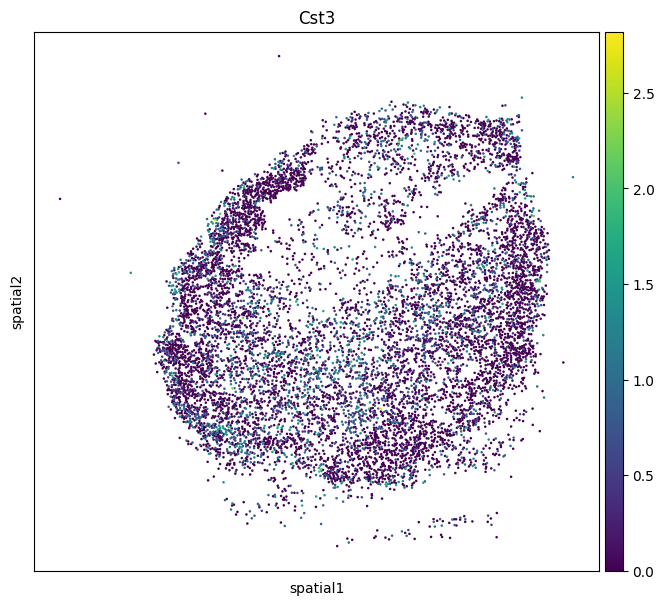

In [118]:
sc.pl.embedding(adata_train, color='Cst3', basis='spatial', layer='normalized_count', cmap='viridis')

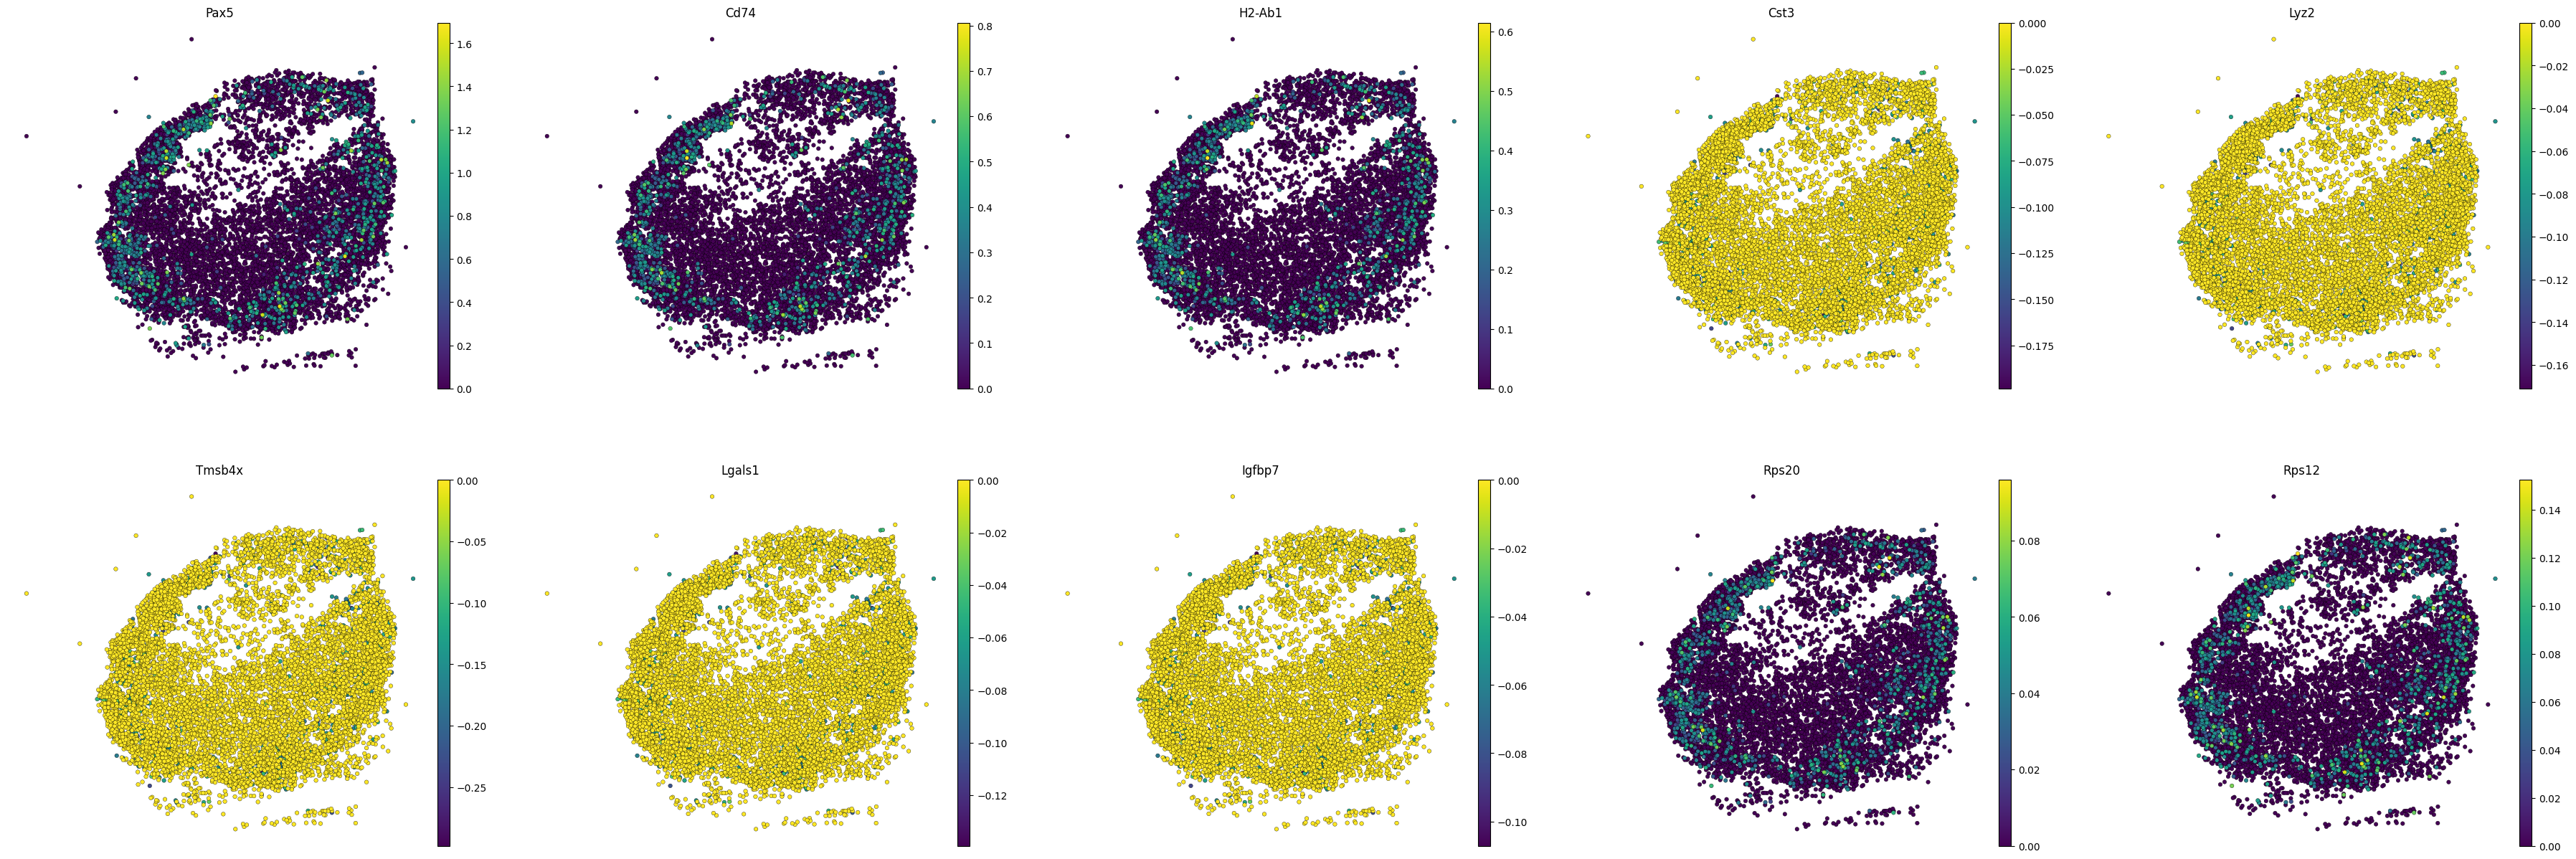

In [139]:
plt.rcParams['figure.figsize'] = (8, 7)
sc.pl.embedding(
    adata_train, color=delta.mean(axis=0).abs().sort_values(ascending=False)[:10].index, 
    basis='spatial', layer='perturbed_co_delta', frameon=False, ncols=5,
    cmap='viridis', s=65, edgecolor='black', linewidth=0.25)

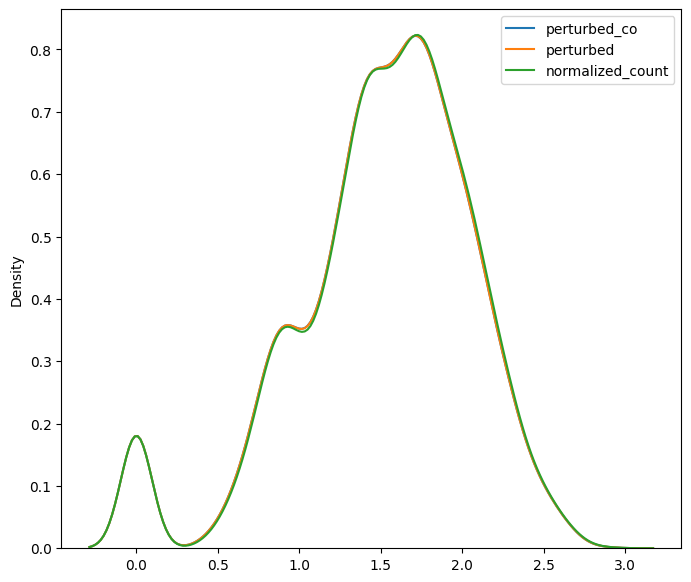

In [145]:
plt.rcParams['figure.figsize'] = [9, 4]
plt.rcParams['figure.dpi'] = 120

cluster = 0
sns.kdeplot(adata_train.to_df(
    layer='perturbed_co')[so.adata.obs['rctd_cluster'] == cluster][gene].values, 
    label='CellOracle', color='red', shade=True, linewidth=1)
sns.kdeplot(adata_train.to_df(
    layer='perturbed_so')[so.adata.obs['rctd_cluster'] == cluster][gene].values, 
    label='SpaceOracle', color='blue', shade=True, linewidth=1)
sns.kdeplot(adata_train.to_df(
    layer='imputed_count')[so.adata.obs['rctd_cluster'] == cluster][gene].values, 
    label='imputed_count', color='green', shade=True, linewidth=1)

plt.title('B-cell')
plt.legend()
plt.show()

In [111]:
delta = adata_train.to_df(layer='normalized_count') - adata_train.to_df(layer='perturbed')

In [112]:
delta.mean(0).sort_values(ascending=False)[:15]

Pax5       0.091604
Cd74       0.020498
H2-Ab1     0.012119
Rps20      0.004640
Rps12      0.004426
Mef2c      0.003682
Iglc3      0.002958
H2-DMb2    0.002511
Ms4a1      0.002447
Ifi30      0.002176
Fcer2a     0.001860
Pxk        0.001787
Iglc2      0.001603
Scd1       0.001360
Ralgps2    0.001234
dtype: float64

In [72]:
adata_train.to_df(layer='normalized_count')[['Cd74', 'Pax5']].mean()

Cd74    0.876883
Pax5    0.091604
dtype: float32

In [108]:
so.beta_dict['Pax5'].regulators.index('Mef2c')

9

In [110]:
[so.beta_dict['Pax5'].betas[so.adata.obs['rctd_cluster'] == i, :][:, 9].mean() for i in range(7)]

[-0.010842507,
 0.01111807,
 0.009431313,
 0.006326492,
 0.0104477275,
 -0.00088501396,
 0.0043515773]

In [106]:
so.grn.get_regulators_with_pvalues(so.adata, target_gene='Pax5').query('source == "Mef2c"')

source  coef_mean
4   Mef2c   0.022826
19  Mef2c   0.022199
33  Mef2c   0.025515
48  Mef2c   0.007097
65  Mef2c   0.018683
77  Mef2c   0.009432
91  Mef2c   0.005980

In [73]:
delta.mean(0).sort_values(ascending=False)[:15]

Pax5       0.091604
Cd74       0.020498
H2-Ab1     0.012119
Rps20      0.004640
Rps12      0.004426
Mef2c      0.003682
Iglc3      0.002958
H2-DMb2    0.002511
Ms4a1      0.002447
Ifi30      0.002176
Fcer2a     0.001860
Pxk        0.001787
Iglc2      0.001603
Scd1       0.001360
Ralgps2    0.001234
dtype: float64

In [43]:
delta.mean(axis=0).abs().sort_values(ascending=False)[:15]

Pax5         0.091604
Cd74         0.020498
H2-Ab1       0.012119
Cst3         0.009909
Lyz2         0.009397
Tmsb4x       0.009372
Lgals1       0.006948
Igfbp7       0.006085
Rps20        0.004640
Rps12        0.004426
Fth1         0.004364
Apoe         0.004189
Fscn1        0.003819
Mef2c        0.003682
Serpinb6b    0.003490
dtype: float64

In [166]:
from spaceoracle.callbacks.fixtures.simulator import SimulatedData

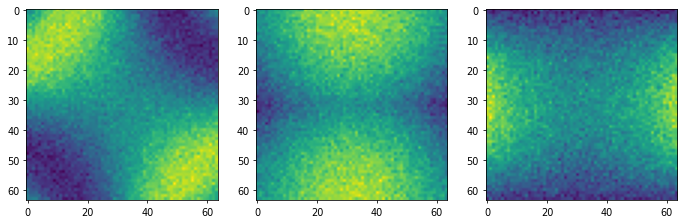

In [173]:
f, axs = plt.subplots(1, 3  , figsize=(12, 6))
axs[0].imshow(SimulatedData.gt['beta0'].values.reshape(64, 64))
axs[1].imshow(SimulatedData.gt['beta1'].values.reshape(64, 64))
axs[2].imshow(SimulatedData.gt['beta2'].values.reshape(64, 64))
plt.show()


In [261]:
import squidpy as sq

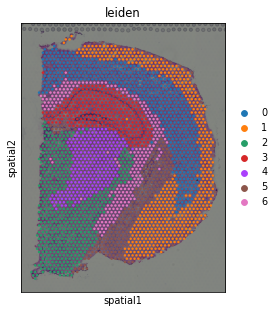

In [385]:
# Load Visium data using squidpy
adata = sq.datasets.visium_hne_adata()

# Preprocess the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Calculate highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

# Perform dimensionality reduction
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

# Compute UMAP embedding
sc.tl.umap(adata)


sc.tl.leiden(adata, resolution=0.2)
sc.pl.spatial(adata, img_key="hires", show=False, color='leiden')
plt.show()

grid = np.full((64, 64), -1)
min_row, max_row = adata.obs['array_row'].min(), adata.obs['array_row'].max()
min_col, max_col = adata.obs['array_col'].min(), adata.obs['array_col'].max()
row_scale = 63 / (max_row - min_row)
col_scale = 63 / (max_col - min_col)

# Iterate through adata.obs and assign leiden values to the grid
for idx, row in adata.obs.iterrows():
    grid_row = int((row['array_row'] - min_row) * row_scale)
    grid_col = int((row['array_col'] - min_col) * col_scale)
    grid[grid_row, grid_col] = int(row['leiden'])

adata_64x64 = sc.AnnData(X=grid.reshape(-1, 1), obs={'leiden': grid.flatten()})
adata_64x64.obs['leiden'] = adata_64x64.obs['leiden'].astype('category')
mask = grid != -1
valid_coords = np.argwhere(mask)
leiden_values = grid[mask]
from scipy.spatial import cKDTree
tree = cKDTree(valid_coords)
distances, indices = tree.query(np.argwhere(~mask))
filled_grid = grid.copy()
filled_grid[~mask] = leiden_values[indices]
adata_64x64.obs['leiden'] = filled_grid.flatten()
adata_64x64.obs['leiden'] = adata_64x64.obs['leiden'].astype('category')

In [412]:
gt = SimulatedData.gt
from anndata import AnnData

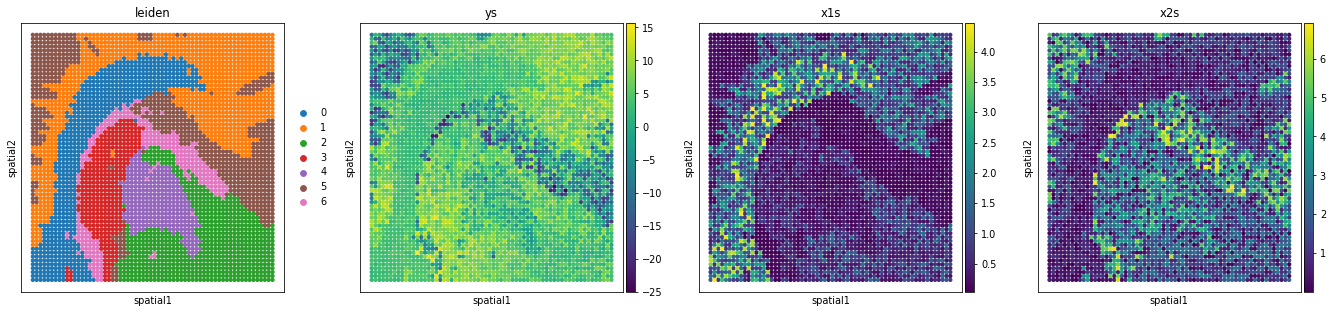

In [427]:
gt['beta0s'] = gt.beta0 * (np.array(adata_64x64.obs.leiden.values)+1)
gt['beta1s'] = gt.beta1 * np.array(adata_64x64.obs.leiden.values)+0.5
gt['beta2s'] = gt.beta2 * 1-np.array(adata_64x64.obs.leiden.values)
gt['x1s'] = np.sqrt(np.exp((gt.x1 * 4-(np.array(adata_64x64.obs.leiden.values)+1)).values))
gt['x2s'] = (gt.x2 * (np.array(adata_64x64.obs.leiden.values)+1)).values
gt['ys'] = gt.beta0s + gt.beta1s*gt.x1s + gt.beta2s*gt.x2s
labels = np.array(adata_64x64.obs.leiden.values).copy()

adata_train = AnnData(
    gt[['x1s', 'x2s', 'ys']], 
    obs={'leiden': labels},
    obsm={'spatial': gt[['row', 'col']].values})
adata_train.obs['leiden'] = adata_train.obs['leiden'].astype('category')

sc.pl.embedding(adata_train, color=['leiden', 'ys', 'x1s', 'x2s'], basis='spatial', s=80)

In [434]:
adata_train.layers['normalized_count'] = adata_train.to_df().values
adata_train.layers['imputed_count'] = adata_train.to_df().values
adata_train.obs['rctd_cluster'] = adata_train.obs['leiden'].copy()

In [504]:
import pyro
from spaceoracle.models.probabilistic_estimators import ProbabilisticPixelAttention
from spaceoracle.models.estimators import PixelAttention

In [444]:
estimator.grn.links_day3_1[0]

source         target  coef_mean  coef_abs             p      -logp
0       Gata2  0610009L18Rik   0.000029  0.000029  2.041141e-03   2.690127
1        Klf9  0610009L18Rik   0.000193  0.000193  1.889399e-08   7.723676
2        Brf1  0610009L18Rik   0.000100  0.000100  5.663244e-06   5.246935
3       Rreb1  0610009L18Rik   0.000114  0.000114  9.528770e-13  12.020963
4       Smad4  0610009L18Rik   0.000265  0.000265  2.052356e-07   6.687747
...       ...            ...        ...       ...           ...        ...
336556   Pax5          Zzef1  -0.000864  0.000864  1.322281e-06   5.878676
336557    Vdr          Zzef1  -0.000443  0.000443  1.336296e-10   9.874097
336558   Egr1          Zzef1   0.001771  0.001771  6.516300e-10   9.185999
336559    Max          Zzef1   0.001367  0.001367  6.940451e-12  11.158612
336560   Maff          Zzef1  -0.000453  0.000453  6.506068e-09   8.186681

[336561 rows x 6 columns]

In [448]:
from spaceoracle.tools.network import CellOracleLinks

In [457]:

class SimpleGRN(CellOracleLinks):
    def __init__(self):
        self.links_day3_1 = {0: 
            pd.DataFrame([['x1s', 'ys', 1, 0], ['x2s', 'ys', 1, 0]], 
            columns=['source', 'target', 'coef_mean', 'p']
            )
        }

In [507]:
%%time
pyro.clear_param_store()

estimator = ProbabilisticPixelAttention(
    adata_train, target_gene='ys', 
    layer='imputed_count', grn=SimpleGRN(), regulators=['x1s', 'x2s'])

spatial_dim = 64

estimator.fit(
    annot='rctd_cluster', 
    max_epochs=10, 
    learning_rate=7e-2, 
    spatial_dim=spatial_dim,
    batch_size=512,
    alpha=0
)

Fitting 7 models in parallel... with 7/11 cores


/opt/homebrew/Caskroom/miniforge/base/envs/SpaceOracle/lib/python3.9/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.B

CPU times: user 18.5 s, sys: 7.88 s, total: 26.4 s
Wall time: 37.4 s


In [480]:
estimator.losses

[14.461431503295898,
 14.461431503295898,
 14.461431503295898,
 14.461431503295898,
 14.461431503295898,
 14.461431503295898,
 14.461431503295898,
 14.461431503295898,
 14.461431503295898,
 14.461431503295898]

In [470]:
spaceoracle.SpaceOracle.imbue_adata_with_space(adata_train, annot='rctd_cluster', spatial_dim=64, in_place=True)

🌍️ Generating spatial 64x64 maps...


In [473]:
adata_train.obsm['spatial_maps'].shape

(4096, 7, 64, 64)

In [481]:
est = estimator
with torch.no_grad():
    betas_ = est.get_betas(
        spatial_maps=np.array(adata_train.obsm['spatial_maps']),
        labels=np.array(adata_train.obs['rctd_cluster']),
    )

    y_pred = est.predict_y(
        est.model, 
        torch.from_numpy(betas_).to(device), 
        torch.from_numpy(np.array(adata_train.obs['rctd_cluster'])).to(device),
        torch.from_numpy(
            adata_train.to_df(layer=est.layer)
            [est.regulators].values.astype(np.float32)).to(device)).cpu().numpy()

In [489]:
anchors = np.stack(
    [est.beta_dists[label].mean(0) for label in torch.from_numpy(np.array(adata_train.obs['rctd_cluster'])).to(device).cpu().numpy()], 
    axis=0
)
betas = betas_*anchors

<Axes: >

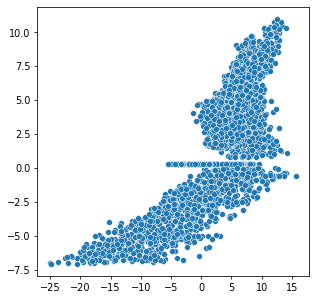

In [488]:
sns.scatterplot(x=adata_train.to_df()['ys'].values, y=y_pred)

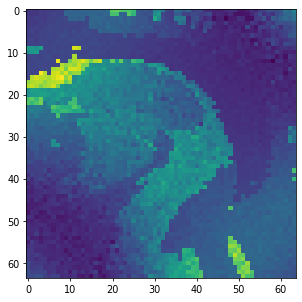

In [497]:
plt.imshow(gt['beta0s'].values.reshape(64, 64))

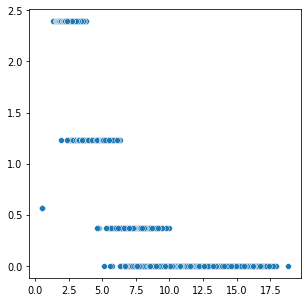

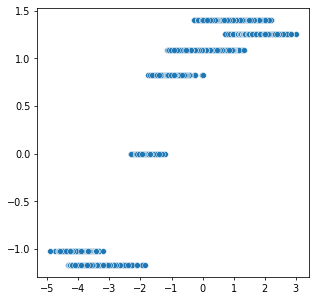

In [510]:
sns.scatterplot(x=gt['beta1s'].values, y=betas[:, 1])
plt.show()

sns.scatterplot(x=gt['beta2s'].values, y=betas[:, 2])
plt.show()

In [508]:
estimator.is_real

0     1     2     3      4      5      6
x1s  True  True  True  True  False  False  False
x2s  True  True  True  True  False   True   True

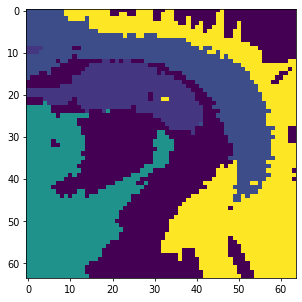

In [511]:
plt.imshow(betas[:, 1].reshape(64, 64))